# Google Data Analytics Netflix Project
##### *by Franco Maldonado*

This is part of Google Data Analytics Netflix Data: Cleaning, Analysis and Visualization
and this workbook has been created to document the entire process of data analysis, cleansing and visualization, and to show the skills and tools to be used. 

## Project background

Netflix is a popular streaming service that offers a vast catalog of movies, TV shows, and original contents. This dataset is a cleaned version of the original version which can be found here. The data consist of contents added to Netflix from 2008 to 2021. The oldest content is as old as 1925 and the newest as 2021. This dataset will be cleaned, vizualized and anlyzed with Python. The purpose of this dataset is to test my data cleaning and visualization skills.


# Ask
#### Objectives:

  1. How many null values do you find in the data and can you eliminate them?
  2. How many incomplete values do you find in the data and can you replace them?
  3. Can you eliminate columns that do not provide you with information? Which ones are they? Why would you eliminate them?
  4. What type of data is the "release_year" column, can you convert it to integer?
  5. The column "listed_in" contains different values separated by comma, can you create a column and keep the first value?
  
**Business task :** Netflix Content Trend Analysis To conduct an exploratory analysis to identify content trends on Netflix, focusing on the most popular genres and their evolution over time.


# Prepare

#### Objectives:

  1. Download  data and store it appropriately.
  2. Identify how it's organized
  3. Sort and filter the data

The data set that is being used for this project is the [Netflix Data: Cleaning, Analysis and Visualization](https://www.kaggle.com/datasets/ariyoomotade/netflix-data-cleaning-analysis-and-visualization) that is hosted on the Kaggle platform as a public dataset. 
The data set contains 18 CSV files that are well categorized with matching, concise file names.

Limitations of data:
   1. Data is collected back in 2022, it is not current
   2. The dataset has a lot of incomplete data.  
  


# Process
#### Objectives:
# 1. Check the data for errors
2. Choose your tools
3. Transform the data so you can work with it effectively
4. Document the cleaning process

The tool I decided to use is the Python language. This is because the data set is very large and cannot be handled efficiently by spreadsheets. On the other hand, using SQL would force us to load the data into BigQuery or employ other additional software. With Python, on the other hand, we can document, process, analyze and visualize our data in a single environment.


In [1]:
# Loading libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# How many null values are there in the dataset and can you remove them?
null_values = df.isnull().sum()
print("Null values in each column:\n", null_values)

#remove null values:
df_cleaned = df.dropna()

NameError: name 'df' is not defined

In [ ]:
# Fill null values with some value (for example, here use a empty string for text columns)
df_filled = df.fillna('Not Given')

In [ ]:
# How many incomplete values are there in the dataset and can you replace them?
# For this case, consider incomplete values as those that have the value 'Not Given'.
incomplete_values = (df == 'Not Given').sum()
print("Incomplete values in each column:\n", incomplete_values)

# Replace 'Not Given' with another value, if necessary (e.g. with None)
df_replaced = df.replace('Not Given', None)

In [ ]:
# Can you delete columns that do not provide you with information? What are they and why should you delete them?
# The column 'show_id' is not relevant for the analysis, I proceed to delete it.
columns_to_drop = ['show_id'] 
df_reduced = df.drop(columns=columns_to_drop)

In [ ]:
# What data type is the "release_year" column and can you convert it to integer?
# I noticed that the data type of "release year" was object type, so I converted it to integer.
print("Type of 'release_year' column:", df['release_year'].dtype)
df['release_year'] = df['release_year'].astype(int)

In [ ]:
# The column "listed_in" contains comma separated values, can you create a column and keep the first value?
df['first_listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

The data cleaning and transformation is now complete. Let's proceed to analyze the data we have.

# Analyze | Share
#### Exploratory data analysis (EDA):
1. Analyze the distribution of genres.
2. Analyze the evolution of genres over time.
3. Visualize trends in popular genres over time.


In [ ]:
#We start by Creating a new column for the first gender

df['first_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0])


In [ ]:
# 2. Exploratory data analysis (EDA)
# Genre distribution
genre_counts = df['first_genre'].value_counts()
print("Distribución de géneros:\n", genre_counts)

# Evolution of the genres over time
genre_year_df = df.groupby(['release_year', 'first_genre']).size().unstack(fill_value=0)
print("Evolución de los géneros a lo largo del tiempo:\n", genre_year_df

# To focus on the most popular genres, we can limit to the top 5 most common genres
top_genres = genre_counts.head(5).index
top_genre_year_df = df.groupby(['release_year', 'first_genre']).size().unstack(fill_value=0)[top_genres]


***I calculate the distribution of genres with value_counts().***
***I group the data by year of release and genre to see the evolution of genres over time.***

In [ ]:
# 3. Visualización
# Plot de la distribución de géneros
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='viridis')
plt.title('Distribución de Géneros en Netflix')
plt.xlabel('Género')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=90)
plt.show()


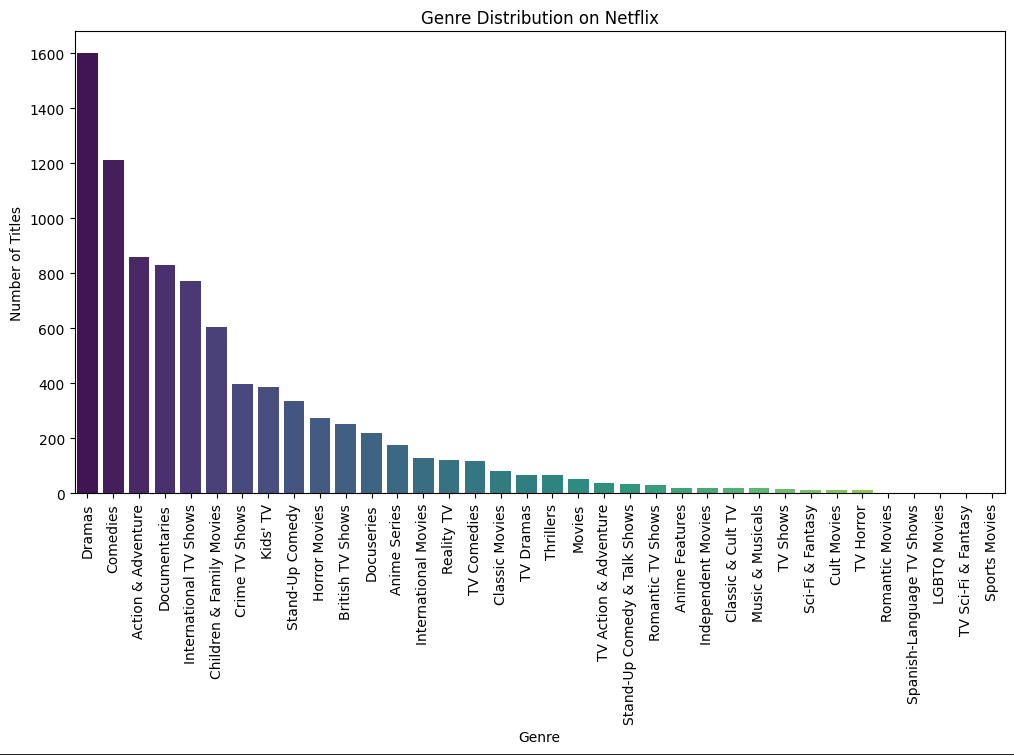

In [ ]:
# Plot of the evolution of the genres over time.
plt.figure(figsize=(14, 10))
sns.lineplot(data=genre_year_df)
plt.title('Evolution of Netflix Genres Over Time')
plt.xlabel('Year of Launch')
plt.ylabel('Numer of Titles')
plt.legend(title='Género', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# To focus on the most popular genres, I limited myself to the 5 most common genres.
top_genres = genre_counts.head(5).index
top_genre_year_df = genre_year_df[top_genres]


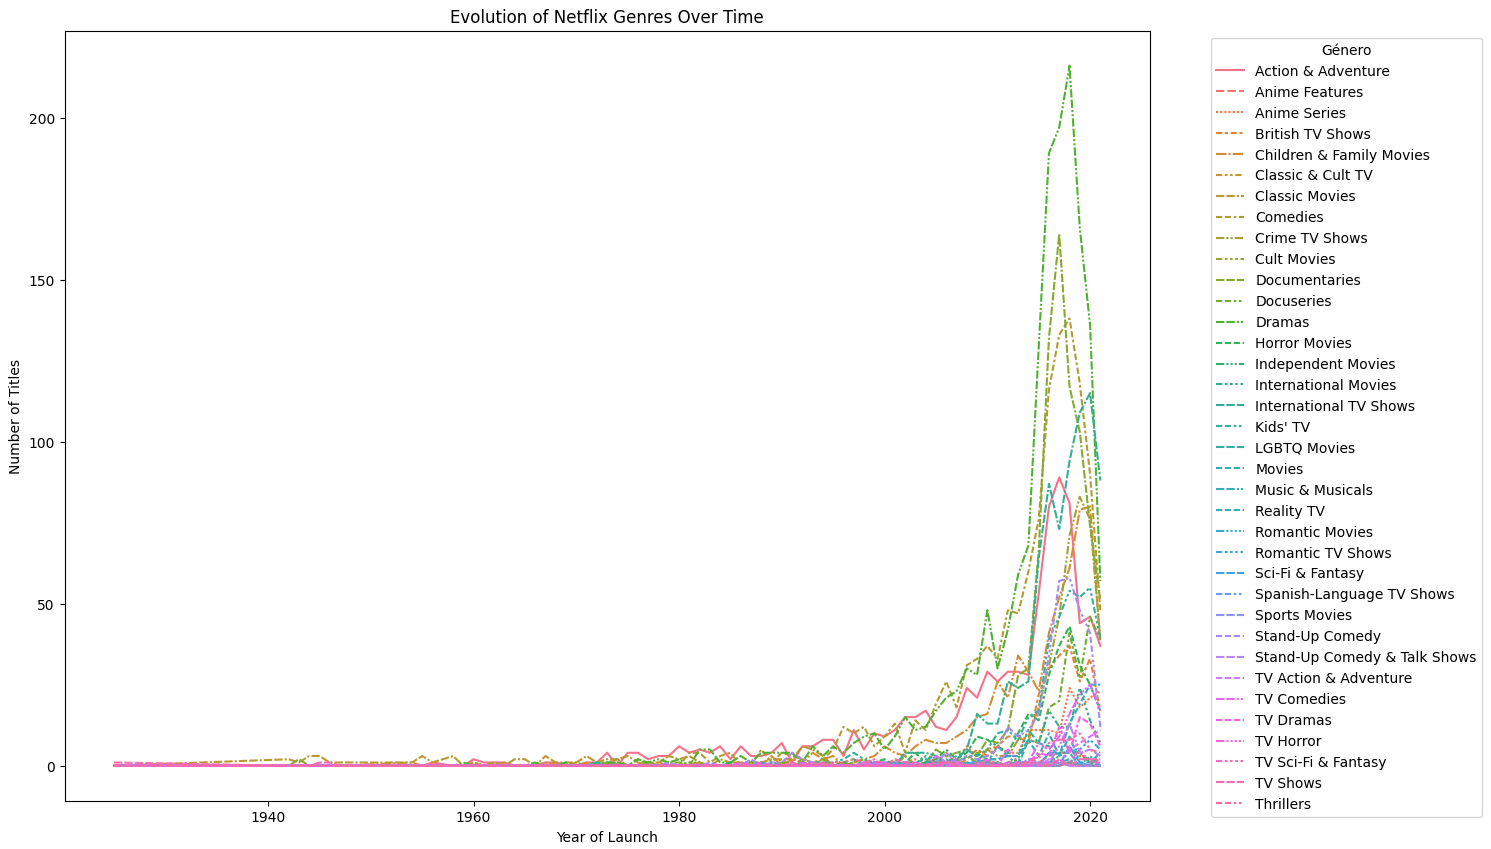

In [ ]:
# Plot of the evolution of the most popular genres over time.
plt.figure(figsize=(14, 10))
sns.lineplot(data=top_genre_year_df)
plt.title('Evolution of the Most Popular Genres on Netflix Over Time')
plt.xlabel('Year of Launch')
plt.ylabel('Numer of Titles')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

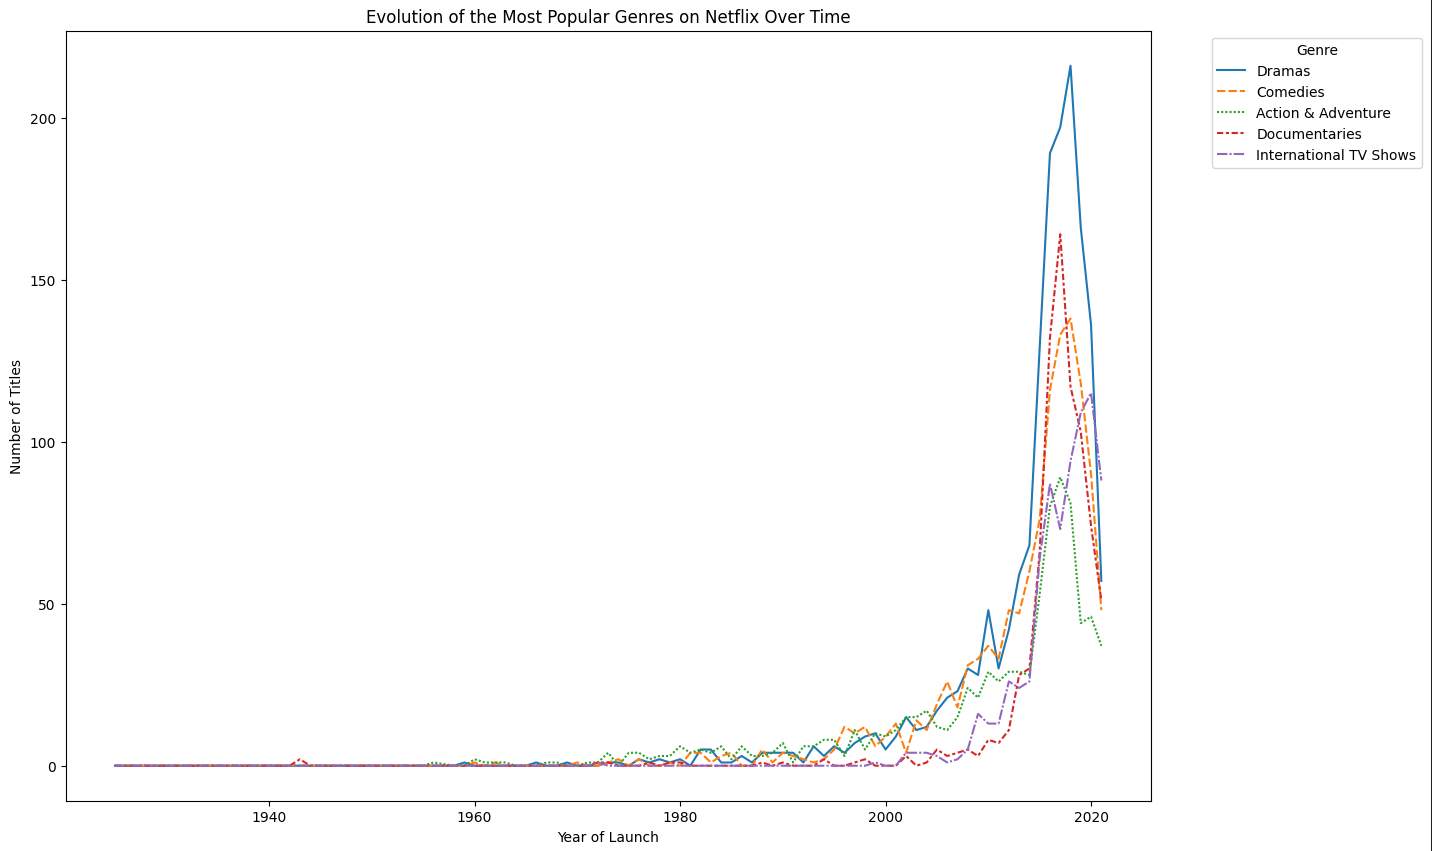

From the visualization, we can see the most popular genres over time are "Dramas".
### Summary of the analysis and visualization

Returning to the task, we wanted to 

#### 1.Analyze the distribution of genres.
The graph shows the distribution of titles in different genres on Netflix. Here are the main observations:

**Dominant Genres:**

• Dramas: It is the genre with the largest number of titles, exceeding 1,500.
Comedies and Action & Adventure: They also have a significant number of titles, with more than 1,000 each.
Intermediate Genres:

• Documentaries and International Series: They have between 600 and 800 titles each.
Children & Family Movies and Crime Series: They have a considerable number of titles, in the range of 400 to 600.
Minor Genres:

• Stand-Up Comedy, Horror Movies, and British Series: They have between 200 and 400 titles each.
Anime Series and International Movies: They are also in this intermediate range.
Genres with Fewer Titles:

• Reality TV, Classic Movies, and Thrillers: They have less than 200 titles each.
Genres such as Cult Movies, Music Movies and Musicals, and Sports Movies: They have less than 100 titles each.
In summary, Netflix offers a wide range of genres, with a predominance of dramas, comedies and action & adventure, while other genres such as documentaries and international series also have a significant presence. Niche and less mainstream genres have less representation on the platform.

###  2.Analyze the evolution of genres over time.
The graph shows how Netflix genres have evolved from the 1930s to 2020. Here's a summary of the main observations:

**Exponential growth:**

•Starting in the 2000s, especially since 2010, there is a significant increase in the number of titles available.
Diversification:

•A greater variety of genres is observed, with "Dramas", "Comedies", "Documentaries" and "Horror Movies" among the most prolific.
Popularity Peaks:

•There is a notable increase in titles around 2015-2020, coinciding with the expansion of original and licensed content by Netflix.
Emerging Genres:

•Genres like “LGBTQ Movies,” “Anime,” and “Independent Movies” have gained presence over the past two decades.

###  3.Visualize trends in popular genres over time.

The graph shows the evolution of the most popular genres on Netflix from the 1930s to 2020. Here are the key observations:

**Accelerated growth:**

•All genres show a significant increase in the number of titles since the 2000s, with a notable peak around 2020.
Main Genres:

•Dramas: It is the genre with the most titles, clearly standing out from the others.
Comedies and Documentaries: They also show a strong increase, although less pronounced than dramas.
Action and Adventure and International Series: They have grown, but to a lesser extent compared to dramas and comedies.
Recent Trends:

•There is a slight decrease in the number of titles after the 2020 peak, which could reflect changes in Netflix's content strategy.
In short, the graph reflects rapid growth in popular Netflix genres since the 2000s, with dramas leading the way.

# Act

There are three recommendations that I can give Netflix based on the data I obtained from my analysis.

1. **Focus on Popular Genres.** Netflix should continue investing in dramas and comedies due to their high demand.

2. **Explore Emerging Genres.** Greater investment in genres like anime and LGBTQ films can attract new audiences.

3. **Trend Monitoring:** Continue to monitor trends and adjust content strategies based on changing user preferences.
 
